# OMIS 114 Final Project - Flight Prices
#### By John Casey, Austin Douthit, and Suren Dharmasena

## Data Set Description

This data set represents searches that took place on Expedia between April 16th, 2022 and October 5th, 2022. Each row represents a purchasable ticket found on the sight that are to/from 16 different airports across the US those airports being ATL, DFW, DEN, ORD, LAX, CLT, MIA, JFK, EWR, SFO, DTW, BOS, PHL, LGA, IAD, and OAK. 

## Data Dictionary

Below is the data dictionary that defines each column and the data contained within each:

* <b>searchDate</b>: The date (YYYY-MM-DD) on which this entry was taken from Expedia.
* <b>searchDayofWeek</b>: The day of the week (0=Monday, 6=Sunday) when the Expedia search was made.
* <b>flightDate</b>: The date (YYYY-MM-DD) of the flight.
* <b>flightDayofWeek</b>: The day of the week (0=Monday, 6=Sunday) for the scheduled trip.
* <b>startingAirport</b>: Three-character IATA airport code for the initial location.
* <b>layoverAirport</b>: Three-character IATA airport code for the layover.
* <b>destinationAirport</b>: Three-character IATA airport code for the arrival location.
* <b>baseFare</b>: The price of the ticket (in USD).
* <b>totalFare</b>: The price of the ticket (in USD) including taxes and other fees.
* <b>totalTravelDistance</b>: The total travel distance in miles. This data is sometimes missing.
* <b>segment1distance</b>: int containing the total duration of the first leg of the trip in miles
* <b>segment2distance</b>: int containing the total duration of the second leg of the trip in miles
* <b>travelminutes</b>: Int with total travel time of flights in minutes
* <b>segment1min</b>: int containing the number of minutes in the first leg of the trip
* <b>segment2min</b>:  int containing the number of minutes in the second leg of the trip
* <b>segment1AirlineName</b>: string containing the name of the airline for the first leg of the trip
* <b>segment2AirlineName</b>: string containing the name of the airline for the second leg of the trip
* <b>segment1DepartureTime</b>: string containing the departure time for the first leg of the trip (in HR:MN:SS format)
* <b>segment1ArrivalTime</b>: string containing the arrival time for the first leg of the trip (in HR:MN:SS format)
* <b>segment2DepartureTime</b>: string containing the departure time for the second leg of the trip (in HR:MN:SS format) 
* <b>segment2ArrivalTime</b>: string containing the arrival time for the second leg of the trip (in HR:MN:SS format) 
* <b>layoverduration</b>: int containing the number of minutes spent between legs of the trip.
* <b>segment1CabinCode</b>: string containing the cabin for the first leg of the of the trip (e.g. “coach”)
* <b>segment2CabinCode</b>: string containing the cabin for the first leg of the of the trip (e.g. “coach”)
* <b>segment1EquipmentDescription</b>: string containing the type of airplane used in the first leg of the trip
* <b>segment2EquipmentDescription</b>: string containing the type of airplane used in the second leg of the trip
* <b>isBasicEconomy</b>: Boolean for whether the ticket is for basic economy.

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
from datetime import datetime, timedelta, time
import re
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('itineraries.csv', skiprows = lambda i: i > 0 and random.random() > 0.01)

In [3]:
len(df)

821422

In [4]:
df.shape

(821422, 27)

#### Original, uncleaned dataframe

In [5]:
df

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,totalFare,seatsRemaining,totalTravelDistance,segmentsDepartureTimeEpochSeconds,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,948d26b3e5658762cd62f842c87ae46e,2022-04-16,2022-04-17,ATL,BOS,VAA0AKEN,PT8H10M,0,False,False,False,213.02,252.60,2,1462.0,1650190200||1650210960,2022-04-17T06:10:00.000-04:00||2022-04-17T10:5...,1650198000||1650219600,2022-04-17T07:20:00.000-05:00||2022-04-17T14:2...,ORD||BOS,ATL||ORD,United||United,UA||UA,Embraer 175 (Enhanced Winglets)||Boeing 737 MAX 9,7800||8640,600||862,coach||coach
1,5cfc831f1186378b62f262e7b2c92a54,2022-04-16,2022-04-17,ATL,IAD,EAA0OKEN,PT1H51M,0,False,False,True,338.60,378.60,1,541.0,1650216240,2022-04-17T13:24:00.000-04:00,1650222900,2022-04-17T15:15:00.000-04:00,IAD,ATL,United,UA,Embraer 175 (Enhanced Winglets),6660,541,coach
2,3553d6aca390546c031abba5a166afa5,2022-04-16,2022-04-17,ATL,IAD,BA0OA0MQ,PT1H37M,1,False,False,True,450.23,498.60,8,541.0,1650250680,2022-04-17T22:58:00.000-04:00,1650256500,2022-04-18T00:35:00.000-04:00,IAD,ATL,Delta,DL,Airbus A319,5820,541,coach
3,c483f193f1c06b0ba26b83a38300e977,2022-04-16,2022-04-17,ATL,LAX,QAA0AFEN,PT9H23M,0,False,False,False,310.70,357.60,2,2055.0,1650200400||1650225300,2022-04-17T09:00:00.000-04:00||2022-04-17T13:5...,1650212460||1650234180,2022-04-17T10:21:00.000-06:00||2022-04-17T15:2...,DEN||LAX,ATL||DEN,United||United,UA||UA,Airbus A319||Boeing 737-900,12060||8880,1207||848,coach||coach
4,baf6404242b09b9b422a4f92eb0e3d73,2022-04-16,2022-04-17,ATL,LAX,HA0QA0MQ,PT7H6M,0,False,False,False,450.23,507.60,9,2161.0,1650238560||1650257940,2022-04-17T19:36:00.000-04:00||2022-04-17T22:5...,1650253440||1650264120,2022-04-17T21:44:00.000-06:00||2022-04-17T23:4...,SLC||ONT,ATL||SLC,Delta||Delta,DL||DL,Boeing 757||Boeing 737-800,14880||6180,1587||574,coach||coach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821417,4cdd9da730682ef2fa9b2f9db6b42f39,2022-10-05,2022-11-12,DFW,IAD,VAVNA0BG,PT7H51M,0,True,False,False,96.74,127.60,9,1605.0,1668259800||1668282900,2022-11-12T07:30:00.000-06:00||2022-11-12T14:5...,1668272400||1668288060,2022-11-12T12:00:00.000-05:00||2022-11-12T16:2...,JFK||IAD,DFW||JFK,Delta||Delta,DL||DL,Airbus A220-100||Embraer 175,12600||5160,1384||221,coach||coach
821418,96090da3c33983ea697eca86f99bd397,2022-10-05,2022-11-12,DFW,LAX,UA21NR,PT3H25M,0,False,False,True,12.00,68.59,0,NaN,1668293100,2022-11-12T16:45:00.000-06:00,1668305400,2022-11-12T18:10:00.000-08:00,LAX,DFW,Spirit Airlines,NK,AIRBUS INDUSTRIE A320 SHARKLETS,12300,None,coach
821419,5439decad0391882de5f998d99adef08,2022-10-05,2022-11-12,DFW,LAX,SUAIXSB3,PT6H5M,0,True,False,False,113.49,145.60,7,1419.0,1668297300||1668307140,2022-11-12T17:55:00.000-06:00||2022-11-12T20:3...,1668300960||1668319200,2022-11-12T18:56:00.000-06:00||2022-11-12T22:0...,AUS||LAX,DFW||AUS,American Airlines||American Airlines,AA||AA,Airbus A319||Boeing 737-800,3660||12060,183||1236,coach||coach
821420,e30989573a89169ed06d3ba8772c660c,2022-10-05,2022-11-12,DFW,LGA,N3AHZNB3,PT5H43M,0,True,False,False,124.65,157.60,7,1390.0,1668272520||1668285240,2022-11-12T11:02:00.000-06:00||2022-11-12T14:3...,1668279180||1668293100,2022-11-12T12:53:00.000-06:00||2022-11-12T17:4...,BNA||LGA,DFW||BNA,American Airlines||American Airlines,AA||AA,Airbus A321||Embraer 175,6660||7860,626||764,coach||coach


## Data Cleaning and Preparation

#### To decrease variance and maintain consistency in our analysis, we choose to analyze trips that have one layover. Thus, our first step is to delete rows that contain zero or more than one layover.

#### Trips with one layover have a length of 8 in the <i>segmentsArrivalAirportCode</i> column. For example, a trip from New York to Los Angeles through Dallas would have the structire <i>DFW||LAX</i>.

In [6]:
df['Multiple Layovers'] = df['segmentsArrivalAirportCode'].apply(lambda x: True if (len(x) > 8) else False)
df['Zero Layovers'] = df['segmentsArrivalAirportCode'].apply(lambda x: True if (len(x) < 8) else False)

In [7]:
df = df[(df['Multiple Layovers'] == False) & (df['Zero Layovers'] == False)]

#### The <i>travelDuration</i> column is in ISO 8601 Duration format. To more easily utilize this column, we create a new column, <i>traveltime</i>, using the <i>pd.to_timedelta</i> command. Then, we create a <i>travelminutes</i> column to show the total minutes of each trip.

In [8]:
df['traveltime'] = pd.to_timedelta(df['travelDuration'])

In [9]:
df['travelminutes'] = (df['traveltime'].dt.total_seconds() / 60)

#### The dataframe separates each leg of a trip with "||" in columns with data for each leg. We split these columns to store data from each leg of the trip in separate columns.

In [10]:
df[['segment1min', 'segment2min']] = df['segmentsDurationInSeconds'].str.split('|', 1, expand = True)
df[['segment1distance', 'segment2distance']] = df['segmentsDistance'].str.split('|', 1, expand = True)
df[['segment1CabinCode', 'segment2CabinCode']] = df['segmentsCabinCode'].str.split('|', 1, expand = True)
df[['segment1EquipmentDescription', 'segment2EquipmentDescription']] = df['segmentsEquipmentDescription'].str.split('|', 1, expand = True)
df[['segment1AirlineName', 'segment2AirlineName']] = df['segmentsAirlineName'].str.split('|', 1, expand = True)
df[['segment1DepartureTime', 'segment2DepartureTime']] = df['segmentsDepartureTimeRaw'].str.split('|', 1, expand = True)
df[['segment1ArrivalTime', 'segment2ArrivalTime']] = df['segmentsArrivalTimeRaw'].str.split('|', 1, expand = True)

In [11]:
df['segment2min'] = df['segment2min'].str.replace('|', '', regex = False)
df['segment2distance'] = df['segment2distance'].str.replace('|', '', regex = False)
df['segment2CabinCode'] = df['segment2CabinCode'].str.replace('|', '', regex = False)
df['segment2EquipmentDescription'] = df['segment2EquipmentDescription'].str.replace('|', '', regex = False)
df['segment2AirlineName'] = df['segment2AirlineName'].str.replace('|', '', regex = False)
df['segment1DepartureTime'] = df['segment1DepartureTime'].replace('|', '', regex = False)
df['segment2DepartureTime'] = df['segment2DepartureTime'].str.replace('|', '', regex = False)
df['segment1ArrivalTime'] = df['segment1ArrivalTime'].replace('|', '', regex = False)
df['segment2ArrivalTime'] = df['segment2ArrivalTime'].str.replace('|', '', regex = False)

#### The original dataframe <i>segmentsDurationInSeconds</i> column is better shown in minutes. We convert the <i>segment1min</i> and <i>segment2min</i> columns to minutes by dividing by 60.

In [12]:
df['segment1min'] = pd.to_numeric(df['segment1min'])/60
df['segment2min'] = pd.to_numeric(df['segment2min'])/60

#### The <i>Departure Time</i> and <i>Arrival Time</i> columns are more readable in datetime format.

In [13]:
df['segment1DepartureTime'] = pd.to_datetime(df['segment1DepartureTime'])
df['segment2DepartureTime'] = pd.to_datetime(df['segment2DepartureTime'])
df['segment1ArrivalTime'] = pd.to_datetime(df['segment1ArrivalTime'])
df['segment2ArrivalTime'] = pd.to_datetime(df['segment2ArrivalTime'])

#### Departure date is shown in the <i>flightDate</i> column. We extract the departure time from the <i>datetime</i> string using lambda functions.

In [14]:
df['segment1DepartureTime'] = df['segment1DepartureTime'].apply(lambda x: x.time() if x != None else None)
df['segment2DepartureTime'] = df['segment2DepartureTime'].apply(lambda x: x.time() if x != None else None)

In [15]:
df['segment1ArrivalTime'] = df['segment1ArrivalTime'].apply(lambda x: x.time() if x != None else None)
df['segment2ArrivalTime'] = df['segment2ArrivalTime'].apply(lambda x: x.time() if x != None else None)

#### We create a new column <i>layoverairport</i> by extracting the first <i>Arrival Airport</i> from the <i>segmentsArrivalAirportCode</i> column.

In [16]:
df['layoverairport'] = df['segmentsArrivalAirportCode'].str.split('|').apply(lambda x: x[0])

#### We create a new column <i>layoverduration</i> by finding the travel time not spent on a distinct leg of the trip.

In [17]:
df['layoverduration'] = df['travelminutes'] - df['segment2min'] - df['segment1min']

#### We create new columns <i>price/mile</i> and <i>TotalFees</i>.

In [18]:
df['price/mile'] = df.totalFare / df.totalTravelDistance
df['TotalFees'] = df.totalFare - df.baseFare

#### We convert the columns <i>flightDate</i> and <i>searchDate</i> to <i>datetime</i> format and extract the day of the week into new columns that will be relevant to our analysis. Monday=0, Sunday=6.

In [19]:
df['flightDate'] = pd.to_datetime(df['flightDate'])
df['searchDate'] = pd.to_datetime(df['searchDate'])
df['FlightDayofWeek'] = df.flightDate.dt.dayofweek
df['SearchDayofWeek'] = df.searchDate.dt.dayofweek

#### The <i>segment2CabinCode</i> entries became attached to cabin codes in the third segment for those segments with three cabin codes. This happened because we only allowed one "split" when previously splitting columns. We correct for this by replacing the jumbled values with the first element of the value.

In [20]:
df.segment2CabinCode.unique()

array(['coach', 'first', 'premium coach', 'business'], dtype=object)

In [21]:
df['segment2CabinCode'] = df['segment2CabinCode'].str.replace('coachcoach', 'coach', regex = True)
df['segment2CabinCode'] = df['segment2CabinCode'].str.replace('firstfirst', 'first', regex = True)
df['segment2CabinCode'] = df['segment2CabinCode'].str.replace('coachfirst', 'coach', regex = True)
df['segment2CabinCode'] = df['segment2CabinCode'].str.replace('coachcoachcoach', 'coach', regex = True)
df['segment2CabinCode'] = df['segment2CabinCode'].str.replace('premium coachcoach', 'premium coach', regex = True)
df['segment2CabinCode'] = df['segment2CabinCode'].str.replace('coachpremium coach', 'coach', regex = True)

In [22]:
df.segment2CabinCode.unique()

array(['coach', 'first', 'premium coach', 'business'], dtype=object)

In [23]:
df.columns

Index(['legId', 'searchDate', 'flightDate', 'startingAirport',
       'destinationAirport', 'fareBasisCode', 'travelDuration', 'elapsedDays',
       'isBasicEconomy', 'isRefundable', 'isNonStop', 'baseFare', 'totalFare',
       'seatsRemaining', 'totalTravelDistance',
       'segmentsDepartureTimeEpochSeconds', 'segmentsDepartureTimeRaw',
       'segmentsArrivalTimeEpochSeconds', 'segmentsArrivalTimeRaw',
       'segmentsArrivalAirportCode', 'segmentsDepartureAirportCode',
       'segmentsAirlineName', 'segmentsAirlineCode',
       'segmentsEquipmentDescription', 'segmentsDurationInSeconds',
       'segmentsDistance', 'segmentsCabinCode', 'Multiple Layovers',
       'Zero Layovers', 'traveltime', 'travelminutes', 'segment1min',
       'segment2min', 'segment1distance', 'segment2distance',
       'segment1CabinCode', 'segment2CabinCode',
       'segment1EquipmentDescription', 'segment2EquipmentDescription',
       'segment1AirlineName', 'segment2AirlineName', 'segment1DepartureTime',
  

#### As we prepare to analyze the data, we drop columns that were used to generate other columns and columns that are not relevant to our findings.

In [24]:
df.drop(columns = ['fareBasisCode', 'travelDuration', 'elapsedDays', 'isRefundable', 'segmentsArrivalAirportCode', \
       'seatsRemaining', 'segmentsDepartureTimeEpochSeconds', 'segmentsArrivalTimeEpochSeconds', \
       'segmentsDepartureAirportCode', 'segmentsAirlineCode', 'segmentsEquipmentDescription', \
       'segmentsCabinCode', 'segmentsDistance', 'segmentsDurationInSeconds', 'segmentsAirlineName', \
       'segmentsDepartureTimeRaw', 'segmentsArrivalTimeRaw', 'legId', 'traveltime', 'isNonStop', \
       'Zero Layovers', 'Multiple Layovers'], inplace = True)

#### We reorder the columns in an intuituve way that places the most utilized columns on the left.

In [25]:
df = df[['searchDate', 'SearchDayofWeek', 'flightDate', 'FlightDayofWeek', 'startingAirport',\
         'layoverairport', 'destinationAirport', 'baseFare', 'totalFare',
         'totalTravelDistance', 'segment1distance', 'segment2distance', 'travelminutes', 'segment1min',\
         'segment2min', 'segment1AirlineName', 'segment2AirlineName', 'segment1DepartureTime', 'segment1ArrivalTime',\
         'segment2DepartureTime', 'segment2ArrivalTime', 'layoverduration', 'segment1CabinCode',\
         'segment2CabinCode', 'segment1EquipmentDescription', 'segment2EquipmentDescription', 'isBasicEconomy']]

#### Final, cleaned dataframe

In [26]:
df.head()

,searchDate,SearchDayofWeek,flightDate,FlightDayofWeek,startingAirport,layoverairport,destinationAirport,baseFare,totalFare,totalTravelDistance,segment1distance,segment2distance,travelminutes,segment1min,segment2min,segment1AirlineName,segment2AirlineName,segment1DepartureTime,segment1ArrivalTime,segment2DepartureTime,segment2ArrivalTime,layoverduration,segment1CabinCode,segment2CabinCode,segment1EquipmentDescription,segment2EquipmentDescription,isBasicEconomy
0,2022-04-16,5,2022-04-17,6,ATL,ORD,BOS,213.02,252.6,1462.0,600,862,490.0,130.0,144.0,United,United,06:10:00,07:20:00,10:56:00,14:20:00,216.0,coach,coach,Embraer 175 (Enhanced Winglets),Boeing 737 MAX 9,False
3,2022-04-16,5,2022-04-17,6,ATL,DEN,LAX,310.70,357.6,2055.0,1207,848,563.0,201.0,148.0,United,United,09:00:00,10:21:00,13:55:00,15:23:00,214.0,coach,coach,Airbus A319,Boeing 737-900,False
4,2022-04-16,5,2022-04-17,6,ATL,SLC,LAX,450.23,507.6,2161.0,1587,574,426.0,248.0,103.0,Delta,Delta,19:36:00,21:44:00,22:59:00,23:42:00,75.0,coach,coach,Boeing 757,Boeing 737-800,False
6,2022-04-16,5,2022-04-17,6,ATL,DFW,LGA,171.16,207.6,2105.0,725,1380,414.0,143.0,205.0,American Airlines,American Airlines,06:05:00,07:28:00,08:34:00,12:59:00,66.0,coach,coach,Airbus A321,Boeing 737-800,False
7,2022-04-16,5,2022-04-17,6,ATL,LGA,ORD,117.21,149.6,1482.0,762,720,515.0,139.0,165.0,American Airlines,American Airlines,10:40:00,12:59:00,16:30:00,18:15:00,211.0,coach,coach,Embraer 175,Boeing 737-800,False


## Analysis and Findings

## Finding 1: Maching Learning
#### Summary of Finding

 Linear regression analysis predicts that the cabin code (i.e. coach, business, first, etc.) is the top predictor of total price (<i>totalFare</i> column) of a trip.

In [27]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#### Create <i>test_df</i>, a copy of the original dataframe to manipulate for this analysis.

In [28]:
test_df = df.copy()

#### One variable of interest is the time of day that each flight segment departs from the airport. We create new columns <i>departure1timeGroup</i> and <i>departure2timeGroup</i> to create buckets for each departure time. The buckets are as follows.
Morning: 3:00am-9:00am, Lunch: 9:00am-3:00pm, Afternoon: 3:00pm-9:00pm, Redeye: 9:00pm-3:00am

In [30]:
def timeSection(time):
    strTime = time.strftime('%H:%M:%S')
    if strTime < '09:00:01' and strTime > '03:00:00':
        return 'Morning'
    elif strTime < '15:00:01' and strTime > '09:00:00':
        return 'Lunch'
    elif strTime < '21:00:01' and strTime > '15:00:00':
        return 'Afternoon'
    else:
        return 'Redeye'
test_df['departure1timeGroup'] = test_df.segment1DepartureTime.apply(lambda x: timeSection(x))
test_df['departure2timeGroup'] = test_df.segment2DepartureTime.apply(lambda x: np.nan if pd.isnull(x) else timeSection(x))

#### <i>statsmodel</i> Regression summary offers initial insights about the effect of travel distance, airline, ticket type, travel time, and departure time group on total fare cost.

In [31]:
mod = smf.ols(formula='totalFare ~ totalTravelDistance + travelminutes + departure1timeGroup \
    + isBasicEconomy', data=test_df)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              totalFare   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                 3.111e+04
Date:                Mon, 05 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:29:27   Log-Likelihood:            -3.0365e+06
No. Observations:              472219   AIC:                         6.073e+06
Df Residuals:                  472212   BIC:                         6.073e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                        226.6722      0.851    266.432      0.000     225.005     228.340
departure1timeGroup[T.Lunch]       7.3580      0.604     12.185      0.000       6.174       8.542
departure1timeGroup[T.Morning]    -0.1379      0.613     -0.225      0.822      -1.339       1.063
departure1timeGroup[T.Redeye]     -1.1398      0.916     -1.244      0.214      -2.936       0.656
isBasicEconomy[T.True]          -188.9760      0.592   -319.009      0.000    -190.137    -187.815
totalTravelDistance                0.0605      0.000    168.860      0.000       0.060       0.061
travelminutes                      0.1156      0.002     60.824      0.000       0.112       0.119
==============================================================================
Omnibus:                   291948.656   Durbin-Watson:                   1.620
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         11035297.906
Skew:                           2.408   Prob(JB):                         0.00
Kurtosis:                      26.187   Cond. No.                     9.94e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Next, we want to develop a decision tree. We must create dummy variables for those that are not already categorical.

In [32]:
test_df = pd.get_dummies(data = test_df, columns = ['isBasicEconomy', 'startingAirport', 'destinationAirport', \
                                                     'segment1CabinCode',  'segment1AirlineName',  \
                                                     'departure1timeGroup', 'FlightDayofWeek'])

In [33]:
test_df.shape

(522638, 82)

#### Make non-numeric columns numeric

In [34]:
test_df['segment1distance'] = pd.to_numeric(test_df['segment1distance'], errors='coerce')
test_df['segment2distance'] = pd.to_numeric(test_df['segment2distance'], errors='coerce')

#### Define X and Y variables to predict <i>totalFare</i>

In [35]:
Y = test_df.totalFare

X = test_df.drop(columns = ['totalFare', 'searchDate', 'flightDate', 'baseFare', 'segment1DepartureTime', \
                            'segment2DepartureTime', 'segment1ArrivalTime', 'segment2ArrivalTime', \
                            'segment2CabinCode', 'segment2AirlineName',  'departure2timeGroup', \
                            'segment1EquipmentDescription', 'segment2EquipmentDescription', 'layoverairport'], axis = 1)

In [36]:
X.head()

,SearchDayofWeek,totalTravelDistance,segment1distance,segment2distance,travelminutes,segment1min,segment2min,layoverduration,isBasicEconomy_False,isBasicEconomy_True,startingAirport_ATL,startingAirport_BOS,startingAirport_CLT,startingAirport_DEN,startingAirport_DFW,startingAirport_DTW,startingAirport_EWR,startingAirport_IAD,startingAirport_JFK,startingAirport_LAX,startingAirport_LGA,startingAirport_MIA,startingAirport_OAK,startingAirport_ORD,startingAirport_PHL,startingAirport_SFO,destinationAirport_ATL,destinationAirport_BOS,destinationAirport_CLT,destinationAirport_DEN,destinationAirport_DFW,destinationAirport_DTW,destinationAirport_EWR,destinationAirport_IAD,destinationAirport_JFK,destinationAirport_LAX,destinationAirport_LGA,destinationAirport_MIA,destinationAirport_OAK,destinationAirport_ORD,destinationAirport_PHL,destinationAirport_SFO,segment1CabinCode_business,segment1CabinCode_coach,segment1CabinCode_first,segment1CabinCode_premium coach,segment1AirlineName_Alaska Airlines,segment1AirlineName_American Airlines,segment1AirlineName_Cape Air,segment1AirlineName_Delta,segment1AirlineName_Frontier Airlines,segment1AirlineName_Hawaiian Airlines,segment1AirlineName_JetBlue Airways,segment1AirlineName_Key Lime Air,segment1AirlineName_Spirit Airlines,segment1AirlineName_Sun Country Airlines,segment1AirlineName_United,departure1timeGroup_Afternoon,departure1timeGroup_Lunch,departure1timeGroup_Morning,departure1timeGroup_Redeye,FlightDayofWeek_0,FlightDayofWeek_1,FlightDayofWeek_2,FlightDayofWeek_3,FlightDayofWeek_4,FlightDayofWeek_5,FlightDayofWeek_6
0,5,1462.0,600.0,862.0,490.0,130.0,144.0,216.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,5,2055.0,1207.0,848.0,563.0,201.0,148.0,214.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
4,5,2161.0,1587.0,574.0,426.0,248.0,103.0,75.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
6,5,2105.0,725.0,1380.0,414.0,143.0,205.0,66.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
7,5,1482.0,762.0,720.0,515.0,139.0,165.0,211.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


#### Fill null values with column mean values to ensure accurate analysis while avoiding dropping a large number of rows

In [37]:
X.fillna(X.mean(), inplace=True)

#### Build and Display a Decision Tree Regressor

In [38]:
from sklearn import linear_model
import sklearn.tree
OLS = linear_model.LinearRegression()
OLS.fit(X,Y)

LinearRegression()

In [39]:
dt = sklearn.tree.DecisionTreeRegressor(max_depth=2)

In [40]:
dt.fit(X,Y)

DecisionTreeRegressor(max_depth=2)

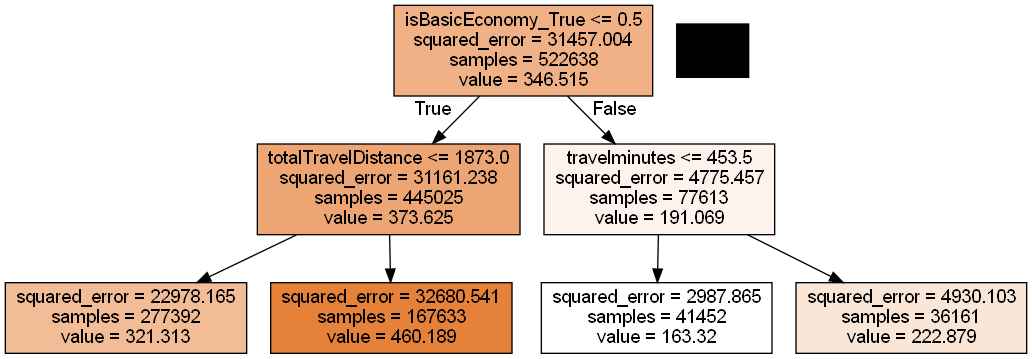

In [41]:
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

#### The model predicts that "Basic Economy" tickets will cost less than "non-Basic Economy" tickets. The next greatest predictor of price is <i>totalTravelDistance</i> and <i>travelminutes</i>. The model predicts that low-mileage trips and low duration flights with will cost less than longer trips.

### Regression for Prediction

#### We now measure the predictive performance by creating a "<i>train_test_split</i>" to evaluate mean squared error and mean absolute deviation.

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import sklearn.metrics as met

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,
                                    test_size=.3,random_state=0)

In [44]:
dt2 = sklearn.tree.DecisionTreeRegressor(random_state = 0)
dt2.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=0)

In [45]:
y_pred = dt2.predict(X_test)

#### Mean Absolute Deviation

#### On average, this model predicts price <i>this many</i> dollars away from the actual price.

In [46]:
met.mean_absolute_error(Y_test, y_pred)

81.56929220772318

#### Mean Squared Error

In [47]:
met.mean_squared_error(Y_test, y_pred)

15378.61656329609

### Explore Relevant Attributes

#### Lastly, we evaluate the effect of each variable on total price by creating and displaying a dictionary mapping column name with corresponding coefficient.

In [48]:
OLS = linear_model.LinearRegression()

In [49]:
OLS.fit(X,Y)

LinearRegression()

In [50]:
d = {X.columns[i]:OLS.coef_[i] for i in range(0, len(OLS.coef_))}

In [51]:
s = pd.Series(d)

In [52]:
pd.set_option('display.max_rows',None)
s.sort_values()

segment1CabinCode_coach                     -765.312560
segment1CabinCode_premium coach             -535.997442
segment1AirlineName_Spirit Airlines         -175.393532
segment1AirlineName_Frontier Airlines       -135.424118
isBasicEconomy_True                          -93.638200
segment1AirlineName_JetBlue Airways          -84.154209
FlightDayofWeek_1                            -39.633156
destinationAirport_MIA                       -35.002146
destinationAirport_DFW                       -33.666953
FlightDayofWeek_2                            -33.439366
startingAirport_MIA                          -31.040018
startingAirport_BOS                          -29.826858
startingAirport_DFW                          -29.277498
segment1AirlineName_Sun Country Airlines     -21.040116
destinationAirport_LAX                       -20.048349
segment1AirlineName_American Airlines        -19.003452
startingAirport_LGA                          -18.221782
destinationAirport_DEN                       -17

### Coefficient Analysis
-The model predicts that If the <i>segment1CabinCode</i> is "Business," <i>totalFare</i> increases by approximately \\$1000

-Monday, Tuesday and Saturday have negative coefficienct, while all other days of the week have positive coefficients.

#### Managerial Insights:
For Expedia users looking for the cheapest tickets, the most important attribute is "Cabin Code." Tickets labeled "Coach" will be significantly cheaper than those labeled "First Class" or "Business Class." Additionally, these users should prioritize "Basic Economy" seats, which also tend to be much cheaper than non-Basic Economy seats. Lastly, buying flights scheduled for Monday or Tuesday will generally be cheaper than those flights later in the week or on weekends.

## Finding 2: Which Airlines Carry the Highest Hidden Fees

<b>Summary of finding</b>: 
The higher the base ticket price, the smaller the percent of that price you would pay in extra fees.

In [53]:
df2 = df.copy()
df2.head()

,searchDate,SearchDayofWeek,flightDate,FlightDayofWeek,startingAirport,layoverairport,destinationAirport,baseFare,totalFare,totalTravelDistance,segment1distance,segment2distance,travelminutes,segment1min,segment2min,segment1AirlineName,segment2AirlineName,segment1DepartureTime,segment1ArrivalTime,segment2DepartureTime,segment2ArrivalTime,layoverduration,segment1CabinCode,segment2CabinCode,segment1EquipmentDescription,segment2EquipmentDescription,isBasicEconomy
0,2022-04-16,5,2022-04-17,6,ATL,ORD,BOS,213.02,252.6,1462.0,600,862,490.0,130.0,144.0,United,United,06:10:00,07:20:00,10:56:00,14:20:00,216.0,coach,coach,Embraer 175 (Enhanced Winglets),Boeing 737 MAX 9,False
3,2022-04-16,5,2022-04-17,6,ATL,DEN,LAX,310.70,357.6,2055.0,1207,848,563.0,201.0,148.0,United,United,09:00:00,10:21:00,13:55:00,15:23:00,214.0,coach,coach,Airbus A319,Boeing 737-900,False
4,2022-04-16,5,2022-04-17,6,ATL,SLC,LAX,450.23,507.6,2161.0,1587,574,426.0,248.0,103.0,Delta,Delta,19:36:00,21:44:00,22:59:00,23:42:00,75.0,coach,coach,Boeing 757,Boeing 737-800,False
6,2022-04-16,5,2022-04-17,6,ATL,DFW,LGA,171.16,207.6,2105.0,725,1380,414.0,143.0,205.0,American Airlines,American Airlines,06:05:00,07:28:00,08:34:00,12:59:00,66.0,coach,coach,Airbus A321,Boeing 737-800,False
7,2022-04-16,5,2022-04-17,6,ATL,LGA,ORD,117.21,149.6,1482.0,762,720,515.0,139.0,165.0,American Airlines,American Airlines,10:40:00,12:59:00,16:30:00,18:15:00,211.0,coach,coach,Embraer 175,Boeing 737-800,False


We decided to define the hidden fee of an airline as the difference between the base price of a ticket -- or the price that is shown on expedia to customers -- and the total price of the ticket. Below, we created an additional column, extraFare, which represents this difference

In [54]:
df2['extraFare'] = df2.totalFare - df2.baseFare
df2.extraFare.nlargest(10)

234051    299.18
736850    295.07
762464    293.57
108511    255.50
224850    255.43
775999    253.92
795286    253.92
156648    250.33
11249     247.29
24559     247.29
Name: extraFare, dtype: float64

<b>Validity of Finding</b>:

Graphing the base fare and the extra fare of each airline to get an idea of how the two charts compare.

<AxesSubplot:xlabel='Base Ticket Price', ylabel='Airline'>

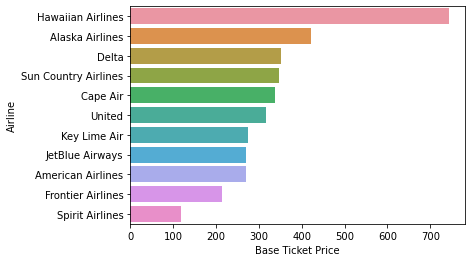

In [55]:
# Base Fare Graph
series = df2.groupby('segment1AirlineName')['baseFare'].mean().sort_values(ascending = False)

df4 = pd.DataFrame({'Airline':series.index, 'Base Ticket Price':series.values})
sns.barplot(data = df4, x = 'Base Ticket Price', y = 'Airline')

<AxesSubplot:xlabel='Additional Fees', ylabel='Airline'>

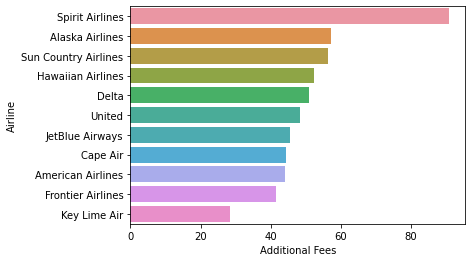

In [56]:
# Extra Fare Graph
series = df2.groupby('segment1AirlineName')['extraFare'].mean().sort_values(ascending = False)

df3 = pd.DataFrame({'Airline':series.index, 'Additional Fees':series.values})
sns.barplot(data = df3, x = 'Additional Fees', y = 'Airline')


Noticing that the cheaper airlines seemed to carry higher extra fees than the more expensive airlines, we took a look at what percentage of the base fare that the extra fare was and created a table displaying said percentages.

In [57]:
fareDF = df2.groupby('segment1AirlineName', as_index = False).agg({'baseFare': 'mean', 'extraFare': 'mean'})
fareDF['percentExtraFare'] = fareDF.extraFare/fareDF.baseFare * 100
sortedFareDF = fareDF.sort_values(by = 'percentExtraFare', ascending = False)
sortedFareDF

,segment1AirlineName,baseFare,extraFare,percentExtraFare
8,Spirit Airlines,117.188720,90.817279,77.496605
4,Frontier Airlines,213.324477,41.504376,19.455984
6,JetBlue Airways,269.122013,45.342174,16.848185
1,American Airlines,268.933083,43.954281,16.343947
9,Sun Country Airlines,346.666841,56.197460,16.210798
10,United,316.368901,48.420086,15.304945
3,Delta,350.535978,51.002722,14.549925
0,Alaska Airlines,421.772715,57.118291,13.542434
2,Cape Air,337.031732,44.201417,13.114913
7,Key Lime Air,273.920455,28.291894,10.328507


In [58]:
sortedFareDF.describe()

,baseFare,extraFare,percentExtraFare
count,11.000000,11.000000,11.000000
mean,332.630901,50.830907,20.020342
std,158.183752,15.464693,19.355837
min,117.188720,28.291894,7.027517
25%,269.027548,44.077849,13.328673
50%,316.368901,48.420086,15.304945
75%,348.601410,54.243730,16.596066
max,744.075000,90.817279,77.496605


Taking a look at the summary statistics for the percentExtraFare, we can see that the median percentage customers can expect to pay on top of the base ticker price is 15.3%

We then created a graph demostrating how each airline was related to one another.

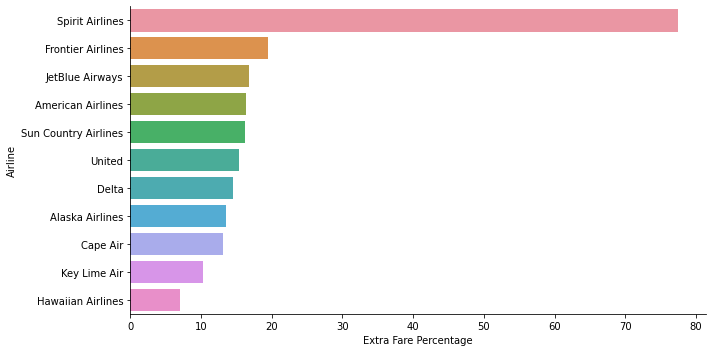

In [59]:
sns.catplot(x = 'percentExtraFare', y = 'segment1AirlineName', data = sortedFareDF, kind = 'bar', aspect = 2)\
            .set(ylabel = 'Airline', xlabel ='Extra Fare Percentage')

#### Managerial Insights

After comparing the extra fare percentage graph to the base fare graph, it is clear that the lower the base fare is for an airline, the higher percentage a customer will be paying on top of that fare in extra fees. The two airlines that are inconsistent with this finding are Key Lime Air and Sun Country Air, the reason for the discrepancy likely being that they are smaller, regional airlines. As a general rule, customers can expect to be paying an additional 15.3% on top of the base ticket price for additional fees. 

## Finding 3: Determining the Most Expensive Days + Months to Fly and the Most Common Routes

<b>Summary of finding</b>: June had the most expensive prices for flights and LAX had the greatest travel volume. Sunday also remained the most expensive day to fly while Tuesday remained the cheapest.

In [60]:
# Extracting the month from the departure time
def extractMonth(departureTime):
    month = departureTime.strftime('%m')
    if month == '04':
        month = 'April'
    if month == '05':
        month = 'May'
    if month == '06':
        month = 'June'
    if month == '07':
        month = 'July'
    if month == '08':
        month = 'August'
    if month == '09':
        month = 'September'
    if month == '10':
        month = 'October'
    if month == '11':
        month = 'November'
    return month
df2['departureMonth'] = df2.segment1DepartureTime.apply(lambda x: extractMonth(x))
df2.head()

,searchDate,SearchDayofWeek,flightDate,FlightDayofWeek,startingAirport,layoverairport,destinationAirport,baseFare,totalFare,totalTravelDistance,segment1distance,segment2distance,travelminutes,segment1min,segment2min,segment1AirlineName,segment2AirlineName,segment1DepartureTime,segment1ArrivalTime,segment2DepartureTime,segment2ArrivalTime,layoverduration,segment1CabinCode,segment2CabinCode,segment1EquipmentDescription,segment2EquipmentDescription,isBasicEconomy,extraFare,departureMonth
0,2022-04-16,5,2022-04-17,6,ATL,ORD,BOS,213.02,252.6,1462.0,600,862,490.0,130.0,144.0,United,United,06:10:00,07:20:00,10:56:00,14:20:00,216.0,coach,coach,Embraer 175 (Enhanced Winglets),Boeing 737 MAX 9,False,39.58,01
3,2022-04-16,5,2022-04-17,6,ATL,DEN,LAX,310.70,357.6,2055.0,1207,848,563.0,201.0,148.0,United,United,09:00:00,10:21:00,13:55:00,15:23:00,214.0,coach,coach,Airbus A319,Boeing 737-900,False,46.90,01
4,2022-04-16,5,2022-04-17,6,ATL,SLC,LAX,450.23,507.6,2161.0,1587,574,426.0,248.0,103.0,Delta,Delta,19:36:00,21:44:00,22:59:00,23:42:00,75.0,coach,coach,Boeing 757,Boeing 737-800,False,57.37,01
6,2022-04-16,5,2022-04-17,6,ATL,DFW,LGA,171.16,207.6,2105.0,725,1380,414.0,143.0,205.0,American Airlines,American Airlines,06:05:00,07:28:00,08:34:00,12:59:00,66.0,coach,coach,Airbus A321,Boeing 737-800,False,36.44,01
7,2022-04-16,5,2022-04-17,6,ATL,LGA,ORD,117.21,149.6,1482.0,762,720,515.0,139.0,165.0,American Airlines,American Airlines,10:40:00,12:59:00,16:30:00,18:15:00,211.0,coach,coach,Embraer 175,Boeing 737-800,False,32.39,01


In [61]:
# Extracting the month from the departure date -
def extractMonth(departureDate):
    #date = datetime.strptime(departureDate, '%Y-%m-%d')
    month = departureDate.strftime('%m')
    if month == '04':
        month = 'April'
    if month == '05':
        month = 'May'
    if month == '06':
        month = 'June'
    if month == '07':
        month = 'July'
    if month == '08':
        month = 'August'
    if month == '09':
        month = 'September'
    if month == '10':
        month = 'October'
    if month == '11':
        month = 'November'
    return month
df2['departureMonth'] = df2.flightDate.apply(lambda x: extractMonth(x))
df2.head()

,searchDate,SearchDayofWeek,flightDate,FlightDayofWeek,startingAirport,layoverairport,destinationAirport,baseFare,totalFare,totalTravelDistance,segment1distance,segment2distance,travelminutes,segment1min,segment2min,segment1AirlineName,segment2AirlineName,segment1DepartureTime,segment1ArrivalTime,segment2DepartureTime,segment2ArrivalTime,layoverduration,segment1CabinCode,segment2CabinCode,segment1EquipmentDescription,segment2EquipmentDescription,isBasicEconomy,extraFare,departureMonth
0,2022-04-16,5,2022-04-17,6,ATL,ORD,BOS,213.02,252.6,1462.0,600,862,490.0,130.0,144.0,United,United,06:10:00,07:20:00,10:56:00,14:20:00,216.0,coach,coach,Embraer 175 (Enhanced Winglets),Boeing 737 MAX 9,False,39.58,April
3,2022-04-16,5,2022-04-17,6,ATL,DEN,LAX,310.70,357.6,2055.0,1207,848,563.0,201.0,148.0,United,United,09:00:00,10:21:00,13:55:00,15:23:00,214.0,coach,coach,Airbus A319,Boeing 737-900,False,46.90,April
4,2022-04-16,5,2022-04-17,6,ATL,SLC,LAX,450.23,507.6,2161.0,1587,574,426.0,248.0,103.0,Delta,Delta,19:36:00,21:44:00,22:59:00,23:42:00,75.0,coach,coach,Boeing 757,Boeing 737-800,False,57.37,April
6,2022-04-16,5,2022-04-17,6,ATL,DFW,LGA,171.16,207.6,2105.0,725,1380,414.0,143.0,205.0,American Airlines,American Airlines,06:05:00,07:28:00,08:34:00,12:59:00,66.0,coach,coach,Airbus A321,Boeing 737-800,False,36.44,April
7,2022-04-16,5,2022-04-17,6,ATL,LGA,ORD,117.21,149.6,1482.0,762,720,515.0,139.0,165.0,American Airlines,American Airlines,10:40:00,12:59:00,16:30:00,18:15:00,211.0,coach,coach,Embraer 175,Boeing 737-800,False,32.39,April


To avoid skewed data, we do not utilize monthly insights from November because the dataset only included a small number of entries from that month.

In [63]:
dfmeasure = df2[df2['departureMonth'] != 'November']

#### Most Expensive day to fly

In [78]:
#extracting the day of week from the flight departure time
def extractDayOfWeek(departureDate):
    #date = datetime.strptime(departureDate, '%Y-%m-%d')
    dayOfWeek = departureDate.weekday()
    if dayOfWeek == 0:
        dayOfWeek = 'Monday'
    if dayOfWeek == 1:
        dayOfWeek = 'Tuesday'
    if dayOfWeek == 2:
        dayOfWeek = 'Wednesday'
    if dayOfWeek == 3:
        dayOfWeek = 'Thursday'
    if dayOfWeek == 4:
        dayOfWeek = 'Friday'
    if dayOfWeek == 5:
        dayOfWeek = 'Saturday'
    if dayOfWeek == 6:
        dayOfWeek = 'Sunday'
    return dayOfWeek
df2['dayOfWeek'] = df2.flightDate.apply(lambda x: extractDayOfWeek(x))

In [79]:
dfmeasure.groupby('dayOfWeek').baseFare.mean().sort_values(ascending = False)

dayOfWeek
Sunday       365.800733
Friday       321.634676
Monday       312.034700
Thursday     306.428773
Saturday     290.402201
Wednesday    259.144081
Tuesday      250.142302
Name: baseFare, dtype: float64

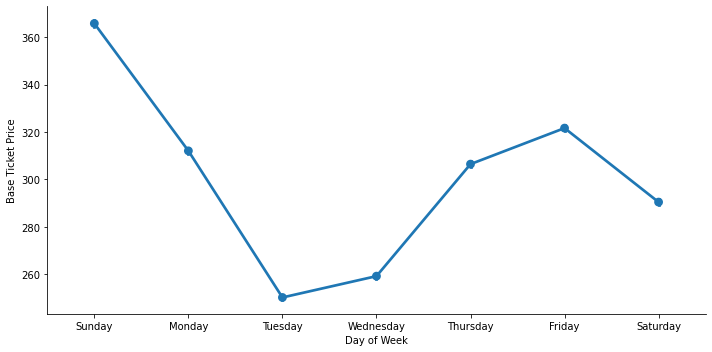

In [80]:
sns.catplot(y = 'baseFare', x = 'dayOfWeek', data = dfmeasure, kind = 'point', aspect = 2)\
        .set(ylabel = 'Base Ticket Price', xlabel = 'Day of Week')

In [66]:
dfmeasure.groupby('dayOfWeek').totalFare.count().nlargest(10)

dayOfWeek
Tuesday      81563
Wednesday    79167
Thursday     72888
Monday       72424
Friday       70850
Saturday     67367
Sunday       61837
Name: totalFare, dtype: int64

The most expensive flights on average oocured on Sunday at 365 dollars per base ticket. Throughout the week, flight tickets dropped with Tuesday being the cheapest day to fly. Tuesdays average base ticket price was at 250 dollars which is over 100 dollars cheaper than Sunday as well. However, it is important nothing that Tuesday had the greatest flight volume while Sunday had the lowest.  

#### Most Expensive Months to Fly 

In [67]:
dfmeasure.groupby('departureMonth').baseFare.mean()

departureMonth
April        303.005508
August       284.765895
July         343.528346
June         362.896251
May          325.940079
October      253.314781
September    249.962677
Name: baseFare, dtype: float64

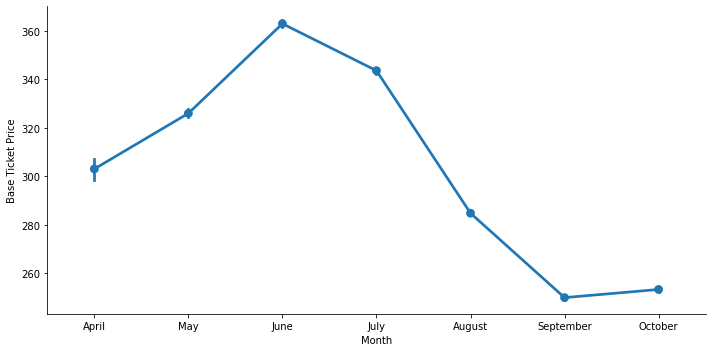

In [68]:
sns.catplot(y = 'baseFare', x = 'departureMonth', data = dfmeasure, kind = 'point', aspect = 2)\
        .set(ylabel = 'Base Ticket Price', xlabel = 'Month')

In [69]:
dfmeasure.groupby('departureMonth').totalFare.count().nlargest(10)

departureMonth
August       113254
September    110912
July          84525
June          73625
October       70351
May           47231
April          6198
Name: totalFare, dtype: int64

The most expensive flights on average occured during the month of June at 362 dollars per base ticket. After June, flight tickets dropped with September being the cheapest month to fly at 249 dollars on average. Overall, we can infer that the summer months of traveling carry higher base ticket prices and the start of fall remains a relatively cheap time to fly. 

#### Most Expensive Months to Fly per Day of Week 

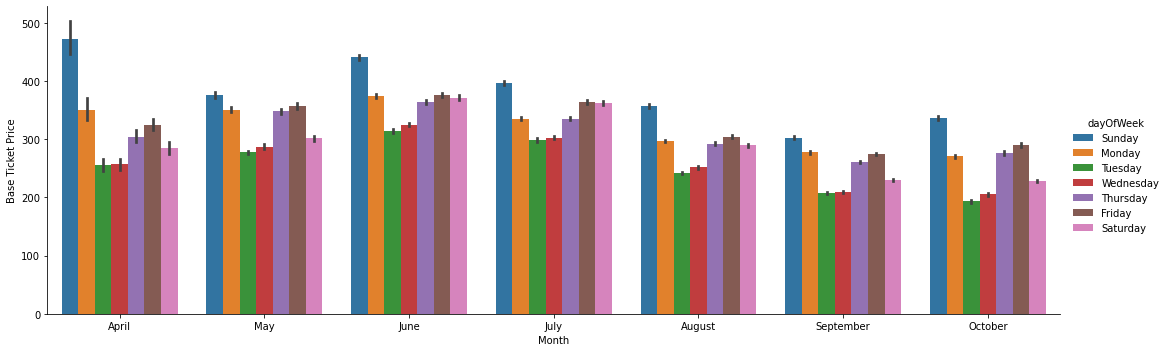

In [70]:
sns.catplot(x = 'departureMonth', y= 'baseFare', data = dfmeasure, hue = 'dayOfWeek', kind = 'bar', aspect = 3)\
        .set(xlabel = 'Month', ylabel = 'Base Ticket Price')

The most expensive flights occured typically during June. It's also interesting to note that the Sunday during April had expensive base ticket prices given major hloidays such as Easter or increased travel during spring break as well. Lastly, we see that the average price of flights slowly decrease after June and remains the lowest during September. People flying on Tuesday during October would be paying the lowest base ticket as well.

#### Find the most Common routes 

In [71]:
frequency = df2.groupby(['startingAirport', 'destinationAirport']).size().nlargest(10)
frequency

startingAirport  destinationAirport
LGA              LAX                   6279
LAX              LGA                   6143
ATL              LAX                   5649
LAX              DTW                   5233
                 BOS                   5070
DTW              LAX                   4953
LAX              ATL                   4930
CLT              LAX                   4785
LAX              PHL                   4679
BOS              LAX                   4622
dtype: int64

[Text(33.0, 0.5, 'Starting'), Text(0.5, 15.0, 'Destination')]

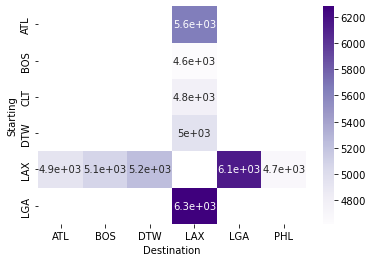

In [72]:
sns.heatmap(data=frequency.unstack(), annot = True, cmap= 'Purples')\
.set(ylabel = 'Starting', xlabel = 'Destination')

We see that LAX is the busiest airport since the majority of the departures and arrivals contains this airport. LAX is also one of the bigger airports that we analyzed in this dataset as well so this finding comes to no surprise for our group. With this, we decided to analyze what time is the most popular time to fly to LAX. 

In [73]:
LAXtracker = df2.groupby(['startingAirport', 'destinationAirport', 'departureMonth']).size().nlargest(10)
LAXtracker

startingAirport  destinationAirport  departureMonth
LGA              LAX                 August            1315
LAX              LGA                 September         1297
                                     August            1257
LGA              LAX                 September         1218
LAX              DTW                 September         1214
ATL              LAX                 August            1213
                                     September         1211
LAX              DTW                 August            1130
LGA              LAX                 July              1112
LAX              BOS                 August            1082
dtype: int64

[Text(33.0, 0.5, 'Route'), Text(0.5, 15.0, 'Month')]

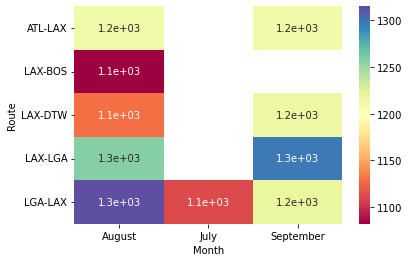

In [74]:
sns.heatmap(data=LAXtracker.unstack(), annot = True, cmap= 'Spectral')\
.set(ylabel = 'Route', xlabel = 'Month')

From this heatmap, we can see that the busiest time of LAX is between the months of August and September in the dataset.

#### Managerial Insights

After looking at the 3 graphs for dates and months, it is evident that midweek remains cheaper to fly than weekends and the Fall months are also cheaper to fly compared to summer. Travelers should also avoid flying especially on Fridays or Sundays since those 2 days specifically have the most expensive base ticket prices on average.

Lastly, customers can expect that LAX will be the most popular airport, especially in August and September.